## Load MNIST 

In [160]:
import pickle
import gzip
import numpy as np
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode
from collections import Counter

In [161]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
print(training_data[0].shape, training_data[1].shape)
print(validation_data[0].shape, validation_data[1].shape)
print(test_data[0].shape, test_data[1].shape)
final_data = np.r_[training_data[0], validation_data[0]]
final_data_target= np.append(training_data[1], validation_data[1])
print(final_data.shape, final_data_target.shape)
f.close()

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)
(60000, 784) (60000,)


In [111]:
majority_voting_list = []

## Implementation 1: Softmax Regression Implementation from scratch

In [4]:
def softmax(Z, epsilon=1e-9):
    e = np.exp(Z - np.max(Z))
    if e.ndim == 1:
        return e / np.sum(e, axis=0) + epsilon
    else:  
        return e / np.array([np.sum(e, axis=1)]).T + epsilon

In [5]:
def infer(W, X):
    X_ones = np.hstack((X, np.ones(((X.shape[0]), 1))))
    XW = np.dot(X_ones, W)
    smax = softmax(XW)
    return smax

In [6]:
eta = 1e-2
def one_hot_encode(labels_list, max_number):
    samples_number = len(labels_list)
    b = np.zeros((samples_number, max_number))
    b[np.arange(samples_number), labels_list] = 1
    return b

In [7]:
def loss(W, X, Y):
    m = X.shape[0]
    Y_tilde = infer(W, X)    
    return (-1 / m) * np.sum(np.log(Y_tilde) * Y) + eta / 2 * np.sum(W * W)

In [8]:
num_classes = 10
y_onehot = one_hot_encode(final_data_target, num_classes)

In [9]:
def get_grad(W, X, Y):   
    X_alt = np.hstack((X, np.ones(((X.shape[0]), 1))))
    m = X.shape[0]
    Y_tilde = infer(W, X)   
    return (-1 / m) * np.dot(X_alt.T, (Y - Y_tilde)) + eta * W

In [10]:
n_classes=10
def train(X_train, y_train, batch_size=512, num_epoch=256, n_classes=n_classes, step=1e-3, plot_loss=True):
    losses = []
    n_features = X_train.shape[1]
    w = np.random.randn(n_features+1, n_classes)/n_features
    for epoch in range(num_epoch):        
        for iter_num, (x_batch, y_batch) in enumerate(zip(np.split(X_train, batch_size), np.split(y_train, batch_size))):
            grad = get_grad(w, x_batch, one_hot_encode(y_batch, n_classes))
            gradient_step = step * grad
            w -= gradient_step
            losses.append(loss(w, x_batch, one_hot_encode(y_batch, n_classes)))
            
    if plot_loss:
        plt.plot(losses)
        plt.title("Loss")
        plt.xlabel("epochs")
        plt.show()    
    return w

## Prediction of Logistic Regression

In [11]:
def make_prediction(X, W):
    probability_matrix = infer(W, X)
    return np.array([np.argmax(t) for t in probability_matrix])

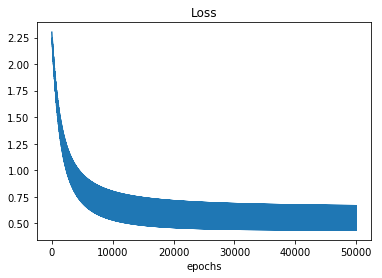

(785, 10)


In [12]:
W = train(final_data, final_data_target, num_epoch=1000)
print(W.shape)

In [112]:
right=0
wrong=0
y_pred = make_prediction(test_data[0], W)

majority_voting_list.append(y_pred)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
for i,j in zip(y_pred,test_data[1]): 
    if j == i:
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))
print("Implementation 1:Testing Accuracy for Softmax Regression with MNIST data: " + str(right/(right+wrong)*100))
print("Implementation 1:Confusion Matrix for Softmax Regression with MNIST data:")
print(confusion_matrix(test_data[1], (y_pred)))

Majority List: (1, 10000)
Errors: 1025  Correct :8975
Implementation 1:Testing Accuracy for Softmax Regression with MNIST data: 89.75
Implementation 1:Confusion Matrix for Softmax Regression with MNIST data:
[[ 960    0    2    3    0    0    7    1    7    0]
 [   0 1103    2    4    1    2    4    0   19    0]
 [  13   12  879   19   18    0   19   22   43    7]
 [   6    1   17  899    1   30    6   15   22   13]
 [   1    6    5    0  898    1   11    1    8   51]
 [  16    8    5   47   16  721   17   10   41   11]
 [  16    3    7    2   13   17  895    1    4    0]
 [   3   21   30    4   11    0    0  914    4   41]
 [  10   11   12   31   11   26   13   13  830   17]
 [  14    8    8    9   47   15    0   24    8  876]]


## Implementation 2: Softmax Regression Using Solver as `Ibfgs`

In [113]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial',solver ='lbfgs').fit(final_data, final_data_target)

In [114]:
y_pred = accuracy_score(test_data[1], mul_lr.predict(test_data[0]))
confusion_matrix_logisticReg2 = confusion_matrix(test_data[1], mul_lr.predict(test_data[0]))
majority_voting_list.append(mul_lr.predict(test_data[0]))
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
print("Implementation 2:Testing Accuracy for Softmax Regression with MNIST data: "+ str(y_pred))
print("Implementation 2:Confusion Matrix for Softmax Regression with MNIST data:")
print(confusion_matrix_logisticReg2)

Majority List: (2, 10000)
Implementation 2:Testing Accuracy for Softmax Regression with MNIST data: 0.9261
Implementation 2:Confusion Matrix for Softmax Regression with MNIST data:
[[ 958    0    0    3    1    8    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   5    7  932   15   10    3   14    7   35    4]
 [   4    1   18  917    1   22    4   11   24    8]
 [   1    1    7    3  917    0   10    4    8   31]
 [  11    2    2   34   11  780   14    5   29    4]
 [   9    3    8    2    8   14  911    2    1    0]
 [   1    7   26    4    7    1    0  950    3   29]
 [   9   12    8   22    7   25   12    6  859   14]
 [  10    8    1    9   23    6    0   19    7  926]]


## Implementation 3: Softmax Regression Using Solver as `Ibfgs` , Penalty as `l2` and `warm_start` as true 

In [14]:
mul_lr2 = linear_model.LogisticRegression(multi_class='multinomial',solver ='lbfgs',penalty ='l2',C=1e5, warm_start=True).fit(final_data, final_data_target)

In [115]:
y_pred = accuracy_score(test_data[1], mul_lr2.predict(test_data[0]))
confusion_matrix_logisticReg3 = confusion_matrix(test_data[1], mul_lr2.predict(test_data[0]))
majority_voting_list.append(mul_lr2.predict(test_data[0]))
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
print("Implementation 3:Testing Accuracy for softmax regression with MNIST data: "+str(y_pred))
print("Implementation 3:Confusion Matrix for Softmax Regression with MNIST data:")
print(confusion_matrix_logisticReg3)

Majority List: (3, 10000)
Implementation 3:Testing Accuracy for softmax regression with MNIST data: 0.9257
Implementation 3:Confusion Matrix for Softmax Regression with MNIST data:
[[ 960    0    0    2    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   5    7  927   17    8    3   16    6   39    4]
 [   4    1   19  916    1   22    4   11   23    9]
 [   1    1    7    3  914    0    9    8    8   31]
 [  11    2    3   32    8  781   15    5   30    5]
 [   9    3    8    2    7   14  912    2    1    0]
 [   1    7   25    5    7    1    0  952    3   27]
 [   8   12    8   24    7   25   12    7  858   13]
 [   8    8    0   11   23    6    0   19    8  926]]


## Implementation 4: Neural Network Using Keras

In [24]:
(x_train, y_train)= (final_data, final_data_target)
(x_test, y_test) = (test_data[0], test_data[1])
num_classes=10
image_vector_size=28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
NN_model = Sequential()
NN_model.add(Dense(units=32, activation='sigmoid', input_shape=(784,)))
NN_model.add(Dense(units=num_classes, activation='softmax'))
NN_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
history = NN_model.fit(x_train, y_train, batch_size=128, epochs=256,verbose=1,validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/256
54000/54000 [==============================] - 3s 64us/step - loss: 2.1239 - acc: 0.4633 - val_loss: 1.9002 - val_acc: 0.7157
Epoch 2/256
54000/54000 [==============================] - 2s 34us/step - loss: 1.7505 - acc: 0.7138 - val_loss: 1.5570 - val_acc: 0.7717
Epoch 3/256
54000/54000 [==============================] - 1s 26us/step - loss: 1.4525 - acc: 0.7523 - val_loss: 1.2802 - val_acc: 0.8075
Epoch 4/256
54000/54000 [==============================] - 1s 26us/step - loss: 1.2217 - acc: 0.7811 - val_loss: 1.0734 - val_acc: 0.8320
Epoch 5/256
54000/54000 [==============================] - 1s 23us/step - loss: 1.0525 - acc: 0.8047 - val_loss: 0.9236 - val_acc: 0.8510
Epoch 6/256
54000/54000 [==============================] - 1s 24us/step - loss: 0.9291 - acc: 0.8199 - val_loss: 0.8138 - val_acc: 0.8633
Epoch 7/256
54000/54000 [==============================] - 1s 23us/step - loss: 0.8370 - acc: 0.8325 - val_loss: 0.7307 - v

Epoch 118/256
54000/54000 [==============================] - 1s 17us/step - loss: 0.2470 - acc: 0.9291 - val_loss: 0.2052 - val_acc: 0.9433
Epoch 119/256
54000/54000 [==============================] - 1s 17us/step - loss: 0.2463 - acc: 0.9292 - val_loss: 0.2046 - val_acc: 0.9435
Epoch 120/256
54000/54000 [==============================] - 1s 17us/step - loss: 0.2456 - acc: 0.9296 - val_loss: 0.2040 - val_acc: 0.9438
Epoch 121/256
54000/54000 [==============================] - 1s 18us/step - loss: 0.2449 - acc: 0.9299 - val_loss: 0.2036 - val_acc: 0.9435
Epoch 122/256
54000/54000 [==============================] - 1s 18us/step - loss: 0.2441 - acc: 0.9301 - val_loss: 0.2029 - val_acc: 0.9440
Epoch 123/256
54000/54000 [==============================] - 1s 17us/step - loss: 0.2434 - acc: 0.9303 - val_loss: 0.2024 - val_acc: 0.9443
Epoch 124/256
54000/54000 [==============================] - 1s 17us/step - loss: 0.2427 - acc: 0.9307 - val_loss: 0.2018 - val_acc: 0.9440
Epoch 125/256
54000/

54000/54000 [==============================] - 1s 13us/step - loss: 0.1892 - acc: 0.9460 - val_loss: 0.1621 - val_acc: 0.9568
Epoch 235/256
54000/54000 [==============================] - 1s 13us/step - loss: 0.1889 - acc: 0.9461 - val_loss: 0.1617 - val_acc: 0.9573
Epoch 236/256
54000/54000 [==============================] - 1s 14us/step - loss: 0.1885 - acc: 0.9462 - val_loss: 0.1615 - val_acc: 0.9572
Epoch 237/256
54000/54000 [==============================] - 1s 14us/step - loss: 0.1882 - acc: 0.9464 - val_loss: 0.1613 - val_acc: 0.9575
Epoch 238/256
54000/54000 [==============================] - 1s 13us/step - loss: 0.1878 - acc: 0.9465 - val_loss: 0.1611 - val_acc: 0.9573
Epoch 239/256
54000/54000 [==============================] - 1s 13us/step - loss: 0.1875 - acc: 0.9466 - val_loss: 0.1608 - val_acc: 0.9577
Epoch 240/256
54000/54000 [==============================] - 1s 13us/step - loss: 0.1872 - acc: 0.9467 - val_loss: 0.1607 - val_acc: 0.9575
Epoch 241/256
54000/54000 [=======

In [116]:
(x_train, y_train)= (final_data, final_data_target)
(x_test, y_test) = (test_data[0], test_data[1])
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

NN_model_pred = NN_model.predict(np.array(x_test))
# confusion_matrix_NN1 = confusion_matrix(test_data[1],NN_model_pred)
NN_predicted_value = NN_model_pred.argmax(axis=-1)
confusion_matrix_NN1 = confusion_matrix(NN_predicted_value,test_data[1])
loss,accuracy = NN_model.evaluate(x_test, y_test, verbose=False)
majority_voting_list.append(NN_predicted_value)
print("Majority List: " + str(np.matrix(majority_voting_list).shape))
print("Implementation 4: Testing Accuracy for Neural Network Using MNIST Dataset:" +str(accuracy))
print("Implementation 4: Confusion Matrix for Neural Network Using MNIST Dataset:")
print(confusion_matrix_NN1)

Majority List: (4, 10000)
Implementation 4: Testing Accuracy for Neural Network Using MNIST Dataset:0.9461
Implementation 4: Confusion Matrix for Neural Network Using MNIST Dataset:
[[ 964    0    9    3    1   10    9    2    5    9]
 [   0 1116    3    0    2    2    3   10    6    6]
 [   1    2  968   19    4    3    2   16    3    1]
 [   1    2    9  950    0   31    1    7   16   13]
 [   0    0   11    0  931    4    7    5    6   25]
 [   4    1    1   13    0  808    7    1   15    7]
 [   6    5    6    1   11    8  926    0    8    1]
 [   2    2    9   11    2    5    0  964    7   13]
 [   2    7   14   12    3   14    3    1  904    4]
 [   0    0    2    1   28    7    0   22    4  930]]


## Implementation 5: Neural Network Using  Library

In [25]:
NN_Classifier2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=256, random_state=1)
NN_Classifier2.fit(final_data, final_data_target)  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=256, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [117]:
NN_pred=NN_Classifier2.predict(test_data[0])
y_pred = accuracy_score(test_data[1],NN_pred)
majority_voting_list.append(NN_pred)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
confusion_matrix_NN2 = confusion_matrix(test_data[1],NN_pred)
print("Implementation 5: Testing Accuracy for Neural Network Using MNIST Dataset:"+str(y_pred))
print("Implementation 5: Confusion Matrix for Neural Network Using MNIST Dataset:")
print(confusion_matrix_NN2)

Majority List: (5, 10000)
Implementation 5: Testing Accuracy for Neural Network Using MNIST Dataset:0.9785
Implementation 5: Confusion Matrix for Neural Network Using MNIST Dataset:
[[ 967    0    2    0    0    2    4    1    3    1]
 [   0 1125    2    1    0    1    2    1    3    0]
 [   1    0 1007    2    1    0    5    7    8    1]
 [   2    0    3  989    0    5    0    3    4    4]
 [   2    0    3    0  958    1    2    2    0   14]
 [   3    0    0   15    2  861    2    2    3    4]
 [   4    3    1    1    4    5  936    1    2    1]
 [   0    4    8    4    1    0    0 1002    6    3]
 [   4    0    1    3    5    1    1    2  955    2]
 [   2    2    1    2    6    5    2    3    1  985]]


## Implementation 6: Neural Network Using Library

In [26]:
NN_Classifier3 = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=200, random_state=1, max_iter=50)
NN_Classifier3.fit(final_data, final_data_target)                         

D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=200, learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [118]:
NN_pred2=NN_Classifier3.predict(test_data[0])
y_pred = accuracy_score(test_data[1],NN_pred)
majority_voting_list.append(NN_pred2)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
confusion_matrix_NN3 = confusion_matrix(test_data[1],NN_pred2)
print("Implementation 6: Testing Accuracy for Neural Network Using MNIST Dataset:"+str(y_pred))
print("Implementation 6: Confusion Matrix for Neural Network Using MNIST Dataset:")
print(confusion_matrix_NN3)

Majority List: (6, 10000)
Implementation 6: Testing Accuracy for Neural Network Using MNIST Dataset:0.9785
Implementation 6: Confusion Matrix for Neural Network Using MNIST Dataset:
[[ 965    0    1    1    0    3    7    1    2    0]
 [   0 1117    3    2    0    1    3    2    7    0]
 [   7    3  969   12    7    2    6    9   15    2]
 [   0    1    7  962    0   12    1   12   10    5]
 [   1    1    3    1  934    0   11    3    5   23]
 [   7    2    1   27    4  817   11    1   15    7]
 [  10    3    4    3    8    9  919    1    1    0]
 [   2    7   20    8    4    1    0  963    1   22]
 [   6    4    4   14    7    9    8    9  907    6]
 [   9    7    1   10   20    3    1   11    6  941]]


## Implementation 7: SVM Using kernel as 'linear'

In [82]:
X_train, y_train = final_data, final_data_target
X_test, y_test = test_data[0], test_data[1]
SVM_classifier1 = SVC(kernel='linear', C=2, gamma= 0.05);
SVM_classifier1.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
X_test, y_test = test_data[0], test_data[1]
SVM_pred1=SVM_classifier1.predict(X_test)
y_pred = accuracy_score(test_data[1],SVM_pred1)
majority_voting_list.append(SVM_pred1)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
confusion_matrix_SVM1 = confusion_matrix(test_data[1],SVM_pred1)
print("Implementation 7: Testing Accuracy for SVM Using MNIST Dataset:"+str(y_pred))
print("Implementation 7: Confusion Matrix for SVM Using MNIST Dataset:")
print(confusion_matrix_SVM1)

Majority List: (11, 10000)
Implementation 7: Testing Accuracy for SVM Using MNIST Dataset:0.9381
Implementation 7: Confusion Matrix for SVM Using MNIST Dataset:
[[ 956    0    4    1    1    8    7    1    0    2]
 [   0 1117    5    3    0    1    2    1    6    0]
 [   5    7  969   11    2    4    7    9   16    2]
 [   4    0   15  950    1   19    1    7   11    2]
 [   1    1    9    0  943    2    5    1    2   18]
 [  11    5    5   37    6  794   12    2   15    5]
 [   6    3   14    2    6   18  906    1    2    0]
 [   2    8   21   12    7    2    0  956    2   18]
 [   8    5    6   28    7   26    8    6  872    8]
 [   7    7    3   13   32    5    1   18    5  918]]


## Implementation 8: SVM Using radial basis function and gamma =1

In [ ]:
X_train, y_train = final_data, final_data_target
SVM_classifier2 = SVC(kernel='rbf', gamma= 1, max_iter= 30);
SVM_classifier2.fit(X_train, y_train)

In [ ]:
X_test, y_test = test_data[0], test_data[1]
SVM_pred2=SVM_classifier2.predict(X_test)
y_pred = accuracy_score(test_data[1],SVM_pred2)
majority_voting_list.append(SVM_pred2)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
confusion_matrix_SVM2 = confusion_matrix(test_data[1],SVM_pred2)
print("Implementation 8: Testing Accuracy for SVM Using MNIST Dataset:"+str(y_pred))
print("Implementation 8: Confusion Matrix for SVM Using MNIST Dataset:")
print(confusion_matrix_SVM2)

## Implementation 9: SVM Using radial basis function and gamma as default

In [107]:
X_train, y_train = final_data, final_data_target
SVM_classifier3 = SVC(kernel='rbf', max_iter= 30);
SVM_classifier3.fit(X_train, y_train)

D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
X_test, y_test = test_data[0], test_data[1]
SVM_pred3=SVM_classifier3.predict(X_test)
y_pred = accuracy_score(test_data[1],SVM_pred3)
majority_voting_list.append(SVM_pred3)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
confusion_matrix_SVM3 = confusion_matrix(test_data[1],SVM_pred3)
print("Implementation 9: Testing Accuracy for SVM Using MNIST Dataset:"+str(y_pred))
print("Implementation 9: Confusion Matrix for SVM Using MNIST Dataset:")
print(confusion_matrix_NN3)

Majority List: (10, 10000)
Implementation 9: Testing Accuracy for SVM Using MNIST Dataset:0.4029
Implementation 9: Confusion Matrix for SVM Using MNIST Dataset:
[[ 965    0    1    1    0    3    7    1    2    0]
 [   0 1117    3    2    0    1    3    2    7    0]
 [   7    3  969   12    7    2    6    9   15    2]
 [   0    1    7  962    0   12    1   12   10    5]
 [   1    1    3    1  934    0   11    3    5   23]
 [   7    2    1   27    4  817   11    1   15    7]
 [  10    3    4    3    8    9  919    1    1    0]
 [   2    7   20    8    4    1    0  963    1   22]
 [   6    4    4   14    7    9    8    9  907    6]
 [   9    7    1   10   20    3    1   11    6  941]]


## Implementation 10: SVM Using kernel as `poly`

In [108]:
X_train, y_train = final_data, final_data_target
SVM_classifier4 = SVC(kernel='poly', C=5, max_iter=20);
SVM_classifier4.fit(X_train, y_train)

D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=20, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
X_test, y_test = test_data[0], test_data[1]
SVM_pred4=SVM_classifier4.predict(X_test)
y_pred = accuracy_score(test_data[1],SVM_pred4)
majority_voting_list.append(SVM_pred4)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
confusion_matrix_SVM4 = confusion_matrix(test_data[1],SVM_pred4)
print("Implementation 10: Testing Accuracy for SVM Using MNIST Dataset:"+str(y_pred))
print("Implementation 10: Confusion Matrix for SVM Using MNIST Dataset:")
print(confusion_matrix_NN4)

Majority List: (11, 10000)
Implementation 10: Testing Accuracy for SVM Using MNIST Dataset:0.1852
Implementation 10: Confusion Matrix for SVM Using MNIST Dataset:
[[ 533   75  115   50   16   91  202   76  170   18]
 [   0  294   10    1   20    7    4  110   16   40]
 [ 229  251 1344  152   47  254  505  203  143  136]
 [  80  165  122 1283   39  216   67  536  303  432]
 [ 184  146   29    4  958   24   71   24   78  102]
 [ 188  181  209  358  208 1224  282  245  694   90]
 [  59   34   61    7   25   46  769    4   74    8]
 [ 169  649   44   61  333   64   31  585   86  629]
 [ 147  142   43   68  184   62   35  166  390  308]
 [ 411   63   22   16  170   12   34   51   46  237]]


## Implementation 11: Random Forest with n_estimators as 10

In [39]:
X_train, y_train = final_data, final_data_target
RF_classifier1 = RandomForestClassifier(n_estimators=10);
RF_classifier1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
X_test, y_test = test_data[0], test_data[1]
RF_pred1=RF_classifier1.predict(X_test)
y_pred = accuracy_score(test_data[1],RF_pred1)
majority_voting_list.append(RF_pred1)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
confusion_matrix_RF1 = confusion_matrix(test_data[1],RF_pred1)
print("Implementation 11: Testing Accuracy for Random Forest Using MNIST Dataset:"+str(y_pred))
print("Implementation 11: Confusion Matrix for Random Forest Using MNIST Dataset:")
print(confusion_matrix_RF1)

Majority List: (7, 10000)
Implementation 11: Testing Accuracy for Random Forest Using MNIST Dataset:0.9463
Implementation 11: Confusion Matrix for Random Forest Using MNIST Dataset:
[[ 968    0    0    1    0    4    3    1    2    1]
 [   0 1122    3    2    0    2    3    0    2    1]
 [  10    1  970   12    8    3    4   13   10    1]
 [   0    0   16  955    0   12    0   11   12    4]
 [   2    0    4    1  935    2    7    1    2   28]
 [   7    2    3   35    4  815    9    1   10    6]
 [  10    2    2    1    9    7  923    0    4    0]
 [   2    8   28    6    6    1    0  960    4   13]
 [   7    0   11   19    7   17    8    4  892    9]
 [   7    5    2   13   33    6    0   10   10  923]]


## Implementation 12: Random Forest with n_estimators as 100

In [41]:
X_train, y_train = final_data, final_data_target
RF_classifier2 = RandomForestClassifier(n_estimators=100, criterion= 'entropy');
RF_classifier2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [120]:
X_test, y_test = test_data[0], test_data[1]
RF_pred2=RF_classifier2.predict(X_test)
y_pred = accuracy_score(test_data[1],RF_pred2)
majority_voting_list.append(RF_pred2)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
confusion_matrix_RF2 = confusion_matrix(test_data[1],RF_pred2)
print("Implementation 12: Testing Accuracy for Random Forest Using MNIST Dataset:"+str(y_pred))
print("Implementation 12: Confusion Matrix for Random Forest Using MNIST Dataset:")
print(confusion_matrix_RF2)

Majority List: (8, 10000)
Implementation 12: Testing Accuracy for Random Forest Using MNIST Dataset:0.9698
Implementation 12: Confusion Matrix for Random Forest Using MNIST Dataset:
[[ 970    1    1    0    0    2    2    1    3    0]
 [   0 1126    2    1    0    2    2    0    1    1]
 [   6    0 1000    7    2    0    3    7    6    1]
 [   0    0    9  971    0    8    0    9    9    4]
 [   2    0    1    0  952    0    6    0    3   18]
 [   2    0    1   13    3  859    4    1    6    3]
 [   6    3    0    0    2    4  941    0    2    0]
 [   2    4   18    1    2    0    0  987    5    9]
 [   5    0    4    8    3    6    5    3  931    9]
 [   4    6    1   11   11    7    1    3    4  961]]


## Implementation 13: Random Forest with n_estimators as 200

In [43]:
X_train, y_train = final_data, final_data_target
RF_classifier3 = RandomForestClassifier(n_estimators=200);
RF_classifier3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [121]:
X_test, y_test = test_data[0], test_data[1]
RF_pred3=RF_classifier3.predict(X_test)
y_pred = accuracy_score(test_data[1],RF_pred3)
majority_voting_list.append(RF_pred3)
print("Majority List: " +  str(np.matrix(majority_voting_list).shape))
confusion_matrix_RF3 = confusion_matrix(test_data[1],RF_pred3)
print("Implementation 13: Testing Accuracy for Random Forest Using MNIST Dataset:"+str(y_pred))
print("Implementation 13: Confusion Matrix for Random Forest Using MNIST Dataset:")
print(confusion_matrix_RF3)

Majority List: (9, 10000)
Implementation 13: Testing Accuracy for Random Forest Using MNIST Dataset:0.971
Implementation 13: Confusion Matrix for Random Forest Using MNIST Dataset:
[[ 971    0    1    0    0    1    3    1    3    0]
 [   0 1124    2    3    0    1    3    0    1    1]
 [   6    0  999    7    2    0    4    9    5    0]
 [   0    0   11  972    0    5    0    9   10    3]
 [   1    0    0    0  960    0    5    0    3   13]
 [   3    0    1   12    4  859    4    2    4    3]
 [   8    3    0    0    2    1  941    0    3    0]
 [   1    3   22    0    0    0    0  991    2    9]
 [   5    0    4    7    5    6    3    3  930   11]
 [   4    5    2    8   11    3    1    4    8  963]]


## Implementation 14: CNN Implementation

In [72]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

(x_train, y_train)= (final_data, final_data_target)
(x_test, y_test) = (test_data[0], test_data[1])
img_x, img_y = 28, 28
batch_size = 128
num_classes = 10
epochs = 10
x_train = x_train.reshape(final_data.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(test_data[0].shape[0], img_x, img_y, 1)

y_train = keras.utils.to_categorical(final_data_target, num_classes)
y_test = keras.utils.to_categorical(test_data[1], num_classes)

input_shape = (img_x, img_y, 1)

CNN_model = Sequential()
CNN_model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),activation='relu',input_shape=input_shape))
CNN_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
CNN_model.add(Conv2D(64, (5, 5), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Flatten())
CNN_model.add(Dense(1000, activation='relu'))
CNN_model.add(Dense(num_classes, activation='softmax'))

CNN_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
CNN_model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 944s 16ms/step - loss: 0.1455 - acc: 0.9563 - val_loss: 0.0442 - val_acc: 0.9875
Epoch 2/10
60000/60000 [==============================] - 935s 16ms/step - loss: 0.0408 - acc: 0.9878 - val_loss: 0.0283 - val_acc: 0.9907
Epoch 3/10
60000/60000 [==============================] - 919s 15ms/step - loss: 0.0274 - acc: 0.9914 - val_loss: 0.0312 - val_acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 10621s 177ms/step - loss: 0.0207 - acc: 0.9930 - val_loss: 0.0265 - val_acc: 0.9924
Epoch 5/10
60000/60000 [==============================] - 918s 15ms/step - loss: 0.0159 - acc: 0.9946 - val_loss: 0.0268 - val_acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 941s 16ms/step - loss: 0.0134 - acc: 0.9957 - val_loss: 0.0278 - val_acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 928s 15ms/step - loss: 0.0107 - acc: 0.9964 - val_loss:

In [122]:
(x_train, y_train)= (final_data, final_data_target)
(x_test, y_test) = (test_data[0], test_data[1])
x_train = x_train.reshape(final_data.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(test_data[0].shape[0], img_x, img_y, 1)

y_train = keras.utils.to_categorical(final_data_target, num_classes)
y_test = keras.utils.to_categorical(test_data[1], num_classes)

score = CNN_model.evaluate(x_test, y_test, verbose=0)
CNN_model_pred = CNN_model.predict(np.array(x_test))
CNN_predicted_value = CNN_model_pred.argmax(axis=-1)
confusion_matrix_CNN1 = confusion_matrix(CNN_predicted_value,test_data[1])
loss,accuracy = CNN_model.evaluate(x_test, y_test, verbose=False)
majority_voting_list.append(CNN_predicted_value)
print(CNN_predicted_value)
print("Majority List: " + str(np.matrix(majority_voting_list).shape))
print('Implementation 14: Testing Accuracy for CNN Using MNIST Dataset:', score[1])
print("Implementation 14: Confusion Matrix for CNN Using MNIST Dataset:")
print(confusion_matrix_CNN1)

[7 2 1 ... 4 5 6]
Majority List: (10, 10000)
Implementation 14: Testing Accuracy for CNN Using MNIST Dataset: 0.9919
Implementation 14: Confusion Matrix for CNN Using MNIST Dataset:
[[ 974    0    2    0    0    1    1    0    1    2]
 [   1 1131    3    0    0    0    2    1    0    0]
 [   1    0 1016    1    0    0    0    2    0    0]
 [   0    1    2 1007    0    7    0    0    0    0]
 [   0    0    0    0  979    0    1    1    0   10]
 [   0    0    0    1    0  878    1    0    0    2]
 [   2    1    4    0    1    4  951    0    2    0]
 [   1    2    3    0    0    0    0 1018    0    0]
 [   1    0    2    1    0    1    2    1  970    0]
 [   0    0    0    0    2    1    0    5    1  995]]


## Majority Voting for MNIST Dataset

In [124]:
final_majority_list = np.matrix(majority_voting_list)
final_majority_list = mode(final_majority_list)
# for i in range(len(test_data[1])):
#     most_common, num_most_common = Counter(final_majority_list.flat).most_common(1)[0]
#     ensemble_list.append(most_common)
# print("Majority Voting" +ensemble_list)

print("Final Majority List: " +str((final_majority_list[0][0]).shape))
y_pred = accuracy_score(test_data[1],final_majority_list[0][0])
MV_confusion_matrix = confusion_matrix(test_data[1],final_majority_list[0][0])
# print("Final Majority List: " +str(ensemble_list.shape))
# y_pred = accuracy_score(test_data[1], ensemble_list)
# MV_confusion_matrix = confusion_matrix(test_data[1],ensemble_list)
print('Testing Accuracy for Majority Voting Using MNIST Dataset:', str(y_pred))
print("Confusion Matrix for Majority Voting  Using MNIST Dataset:")
print(MV_confusion_matrix)

Final Majority List: (10000,)
Testing Accuracy for Majority Voting Using MNIST Dataset: 0.9641
Confusion Matrix for Majority Voting  Using MNIST Dataset:
[[ 971    0    1    1    0    2    2    1    2    0]
 [   0 1123    2    1    0    1    3    1    4    0]
 [   8    2  990    6    3    0    6    8    8    1]
 [   0    0   10  976    0    8    0    6    8    2]
 [   1    0    3    0  955    0    6    0    2   15]
 [   6    1    0   22    4  838    7    1   11    2]
 [   9    3    2    1    4    7  930    1    1    0]
 [   2    5   19    2    2    0    0  986    1   11]
 [   5    2    3   13    6    8    7    5  917    8]
 [   7    6    1   11   16    2    1    6    4  955]]


## Bagging using Softmax Regression for MNIST Data

In [165]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
(x_train, y_train)= (final_data, final_data_target)
(x_test, y_test) = (test_data[0], test_data[1])
bagging1 = BaggingClassifier(base_estimator=mul_lr2, n_estimators=5, max_samples=0.8, max_features=0.8)
bagging1.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=True),
         bootstrap=True, bootstrap_features=False, max_features=0.8,
         max_samples=0.8, n_estimators=5, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [166]:
scores = cross_val_score(bagging1, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(test_data[1],bagging1.predict(x_test))
print(MV_confusion_matrix) 

0.8976252570443334
[[ 955    0    1    3    0    8    7    5    1    0]
 [   0 1111    4    3    0    1    3    2   11    0]
 [   3    8  928   20    7    4   15    8   35    4]
 [   3    1   14  925    0   24    3   11   20    9]
 [   1    4    7    3  917    0    8    5    9   28]
 [   9    3    4   36    8  777   14    7   28    6]
 [   8    3    7    1    7   16  912    2    2    0]
 [   1    7   26    7    7    1    0  949    2   28]
 [   9    8    7   24    7   30   11    9  858   11]
 [   8    7    1   10   24    4    0   20   10  925]]


## Voting Classifier

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
(x_train, y_train)= (final_data, final_data_target)
(x_test, y_test) = (test_data[0], test_data[1])
estimators = []
model1 = mul_lr
estimators.append(('Softmax Regression', model1))
model2 = mul_lr2
estimators.append(('Softmax Regression2', model2))
model3 = NN_Classifier2
estimators.append(('Neural Network Classifier', model3))
model4 = NN_Classifier3
estimators.append(('Neural Network Classifier2', model4))
model5 = SVM_classifier1
estimators.append(('SVM_Classifier1', model5))
model6 = RF_classifier1
estimators.append(('Random Forest', model6))
model7 = RF_classifier2
estimators.append(('Random Forest2', model7))
model8 = RF_classifier3
estimators.append(('Random Forest3', model8))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble,x_test, y_test, cv=5)
print(results.mean())

D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to

0.9417201414033982


D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

## Bagging using neural network for MNIST Data

In [ ]:
bagging2 = BaggingClassifier(base_estimator=NN_Classifier2, n_estimators=5, max_samples=0.8, max_features=0.8)
bagging2.fit(x_train, y_train)

In [ ]:
scores = cross_val_score(bagging2, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(test_data[1],bagging2.predict(x_test))
print(MV_confusion_matrix)

## Bagging using SVM for MNIST Data

In [ ]:
bagging3 = BaggingClassifier(base_estimator=SVM_classifier1, n_estimators=5, max_samples=0.8, max_features=0.8)
bagging3.fit(x_train, y_train)

In [ ]:
scores = cross_val_score(bagging3, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(test_data[1],bagging3.predict(x_test))
print(MV_confusion_matrix)

## Bagging using Random Forest for MNIST Data

In [ ]:
bagging4 = BaggingClassifier(base_estimator=RF_classifier3, n_estimators=5, max_samples=0.8, max_features=0.8)
bagging4.fit(x_train, y_train)

In [ ]:
scores = cross_val_score(bagging4, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(test_data[1],bagging4.predict(x_test))
print(MV_confusion_matrix)

## Boosting using Softmax Regression for MNIST Data

In [170]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
(x_train, y_train)= (final_data, final_data_target)
(x_test, y_test) = (test_data[0], test_data[1])
boosting1 = AdaBoostClassifier(base_estimator=mul_lr2, n_estimators=10)
boosting1.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=True),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [171]:
scores = cross_val_score(boosting1, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(test_data[1],boosting1.predict(x_test))
print(MV_confusion_matrix) 

0.8397181926114442
[[ 874    0   12    2    5   64   15    3    1    4]
 [   0 1106    2    6    0    2    1    1   17    0]
 [   9   57  724   55   20   11   41    8  102    5]
 [   7    3   21  877    3   25    4   15   45   10]
 [   3    1   15    2  881    2    4   18    5   51]
 [  12    8   10  102   17  542   24    8  118   51]
 [  10    4   18    1   34   25  860    1    5    0]
 [   2    7   21   11    5    1    0  911    2   68]
 [  11   16   17   38    8   28   18   13  806   19]
 [   4   10    5   11   48    4    0  169   13  745]]


## Boosting using Random Forest for MNIST Data

In [172]:
(x_train, y_train)= (final_data, final_data_target)
(x_test, y_test) = (test_data[0], test_data[1])
boosting2 = AdaBoostClassifier(base_estimator=RF_classifier3, n_estimators=10)
boosting2.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [173]:
scores = cross_val_score(boosting2, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(test_data[1],boosting2.predict(x_test))
print(MV_confusion_matrix) 

0.9474222005346367
[[ 970    1    1    0    0    2    2    1    2    1]
 [   0 1124    2    3    0    2    2    1    1    0]
 [   6    0 1000    5    3    0    4    8    6    0]
 [   0    0   11  972    1    7    0    9    8    2]
 [   1    0    1    0  952    0    4    0    3   21]
 [   3    0    1   13    3  857    5    1    7    2]
 [   7    3    1    0    4    5  935    0    3    0]
 [   1    2   19    3    1    0    0  987    2   13]
 [   4    0    5    7    2    3    5    5  932   11]
 [   6    6    3   10   12    3    1    3    4  961]]


## Load USPS 

In [19]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPS/Numerals'
savedImg = []
for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
USPSNumeralsTarMat = np.matrix(USPSTar).T
USPSNumeralsInputMat = np.matrix(USPSMat)
print(USPSNumeralsTarMat.shape)
print(USPSNumeralsInputMat.shape)

(19999, 1)
(19999, 784)


In [20]:
USPSTestMat  = []
USPSTestTar  = []
curPath  = 'USPS/Test'
savedImg = []

curFolderPath = curPath + '/'
imgs =  os.listdir(curFolderPath)
for img in imgs:
    curImg = curFolderPath + '/' + img
    if curImg[-3:] == 'png':
        img = Image.open(curImg,'r')
        img = img.resize((28, 28))
        savedImg = img
        imgdata = (255-np.array(img.getdata()))/255
        USPSTestMat.append(imgdata)
        USPSTestTar.append(j) 
USPSTestTar = np.matrix(USPSTestTar).T
USPSInputMat = np.matrix(USPSTestMat)
print(USPSTestTar.shape)
print(USPSInputMat.shape)

(1500, 1)
(1500, 784)


In [133]:
majority_voting_usps = []

## Implementation 1: Logistic Regression  using USPS

In [134]:
right=0
wrong=0
y_pred = make_prediction(np.array(USPSNumeralsInputMat), W)

majority_voting_usps.append(y_pred)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
for i,j in zip(y_pred,USPSNumeralsTarMat): 
    if j == i:
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))
print("Implementation 1: Testing Accuracy for Softmax Regression Using USPS Dataset: " + str(right/(right+wrong)*100))
print("Implementation 1: Confusion Matrix for Softmax Regression Using USPS Dataset:")
print(confusion_matrix(USPSNumeralsTarMat, (y_pred)))

Majority List: (1, 19999)
Errors: 12934  Correct :7065
Implementation 1: Testing Accuracy for Softmax Regression Using USPS Dataset: 35.326766338316915
Implementation 1: Confusion Matrix for Softmax Regression Using USPS Dataset:
[[ 622    4  384   51  294  108   87   42  108  300]
 [ 228  331  133  318  292   59   44  325  255   15]
 [ 216   31 1158  134   74   88   97  105   73   23]
 [ 112    4  122 1233   29  248   32   68   85   67]
 [  57   93   35   54 1071  136   38  132  247  137]
 [ 181   20  205  169   50 1074  125   75   69   32]
 [ 370   14  350   94  108  244  693   30   63   34]
 [ 177  244  336  405   79  113   34  319  242   51]
 [ 218   34  154  200  143  596  118   44  405   88]
 [  50  202  176  439  164   97   15  385  313  159]]


## Implementation 2 : Logistic Regression  using USPS

In [135]:
y_pred = accuracy_score(USPSNumeralsTarMat, mul_lr.predict(USPSNumeralsInputMat))
confusion_matrix_logisticReg2 = confusion_matrix(USPSNumeralsTarMat, mul_lr.predict(USPSNumeralsInputMat))
majority_voting_usps.append(mul_lr.predict(USPSNumeralsInputMat))
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
print('Implementation 2: Testing Accuracy for Softmax Regression Using USPS Dataset:'+str(y_pred))
print("Implementation 2: Confusion Matrix for Softmax Regression Using USPS Dataset:")
print(confusion_matrix_logisticReg2)

Majority List: (2, 19999)
Implementation 2: Testing Accuracy for Softmax Regression Using USPS Dataset:0.31766588329416473
Implementation 2: Confusion Matrix for Softmax Regression Using USPS Dataset:
[[ 390    1  200  149   70  301   31  595   84  179]
 [  37  264  400  134  266  239   18  499  116   27]
 [  46   22 1253  114   23  369   68   41   41   22]
 [  29    6  281  861   10  671    8   74   42   18]
 [  29    9   84   40  660  184   20  727  143  104]
 [  45    5  364  210   19 1191   24   86   44   12]
 [  78    5  728   82   43  427  558   24    9   46]
 [  74   45  108  536   42  188    8  789  161   49]
 [ 172    7  191  501   63  565   76  182  196   47]
 [  15   10  105  501   70   87    6  825  190  191]]


## Implementation 3 : Logistic Regression  using USPS

In [136]:
y_pred = accuracy_score(USPSNumeralsTarMat, mul_lr2.predict(USPSNumeralsInputMat))
confusion_matrix_logisticReg3 = confusion_matrix(USPSNumeralsTarMat, mul_lr2.predict(USPSNumeralsInputMat))
majority_voting_usps.append(mul_lr2.predict(USPSNumeralsInputMat))
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
print('Implementation 3: Testing Accuracy for Softmax Regression Using USPS Dataset:'+str(y_pred))
print("Implementation 3: Confusion Matrix for Softmax Regression Using USPS Dataset:")
print(confusion_matrix_logisticReg3)

Majority List: (3, 19999)
Implementation 3: Testing Accuracy for Softmax Regression Using USPS Dataset:0.31406570328516425
Implementation 3: Confusion Matrix for Softmax Regression Using USPS Dataset:
[[ 371    1  204  153   75  297   33  638   76  152]
 [  36  251  410  130  284  240   18  478  124   29]
 [  47   24 1244  113   21  374   70   41   46   19]
 [  27    5  287  837   12  681    8   78   49   16]
 [  29    5   84   43  638  182   19  763  135  102]
 [  41    5  380  214   21 1168   24   89   44   14]
 [  73    6  731   88   40  418  559   26   12   47]
 [  71   41   98  520   39  177    6  833  166   49]
 [ 177    6  191  508   66  539   76  199  194   44]
 [  14    7  106  493   68   85    3  863  175  186]]


## Implementation 4: Neural Network using USPS

In [137]:
(x_test, y_test) = (np.array(USPSNumeralsInputMat),USPSNumeralsTarMat)
x_test = x_test.reshape(x_test.shape[0], image_vector_size )
y_test = keras.utils.to_categorical(y_test, num_classes)
NN_model_pred = NN_model.predict(np.array(x_test))
print(NN_model_pred.shape)
NN_predicted_value2 = NN_model_pred.argmax(axis=-1)
print(NN_predicted_value2.shape)
confusion_matrix_NN4 = confusion_matrix(NN_predicted_value2,USPSNumeralsTarMat)
loss,accuracy = NN_model.evaluate(x_test, y_test, verbose=False)
majority_voting_list.append(NN_predicted_value2)
print("Majority List: " + str(np.matrix(majority_voting_list).shape))
print("Implementation 4: Testing Accuracy for Neural Network Using USPS Dataset:" +str(accuracy))
print("Implementation 4: Confusion Matrix for Neural Network Using USPS Dataset:")
print(confusion_matrix_NN4)

(19999, 10)
(19999,)
Majority List: (1, 14)
Implementation 4: Testing Accuracy for Neural Network Using USPS Dataset:0.3808690434506824
Implementation 4: Confusion Matrix for Neural Network Using USPS Dataset:
[[ 533   75  115   50   16   91  202   76  170   18]
 [   0  294   10    1   20    7    4  110   16   40]
 [ 229  251 1344  152   47  254  505  203  143  136]
 [  80  165  122 1283   39  216   67  536  303  432]
 [ 184  146   29    4  958   24   71   24   78  102]
 [ 188  181  209  358  208 1224  282  245  694   90]
 [  59   34   61    7   25   46  769    4   74    8]
 [ 169  649   44   61  333   64   31  585   86  629]
 [ 147  142   43   68  184   62   35  166  390  308]
 [ 411   63   22   16  170   12   34   51   46  237]]


## Implementation 5 & 6: Neural Network using USPS 

In [138]:
NN_pred= NN_Classifier2.predict(USPSNumeralsInputMat)
y_pred = accuracy_score(USPSNumeralsTarMat,NN_pred)
majority_voting_usps.append(NN_pred)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
confusion_matrix_NN2 = confusion_matrix(USPSNumeralsTarMat,NN_pred)
print('Implementation 5: Testing Accuracy for Neural Network Using USPS Dataset:'+str(y_pred))
print("Implementation 5: Confusion Matrix for Neural Network Using USPS Dataset:")
print(confusion_matrix_NN2)

NN_pred2=NN_Classifier3.predict(USPSNumeralsInputMat)
y_pred = accuracy_score(USPSNumeralsTarMat,NN_pred)
majority_voting_usps.append(NN_pred2)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
confusion_matrix_NN3 = confusion_matrix(USPSNumeralsTarMat,NN_pred2)
print('Implementation 6: Testing Accuracy for Neural Network Using USPS Dataset:'+str(y_pred))
print("Implementation 6: Confusion Matrix for Neural Network Using USPS Dataset:")
print(confusion_matrix_NN3)

Majority List: (4, 19999)
Implementation 5: Testing Accuracy for Neural Network Using USPS Dataset:0.4856242812140607
Implementation 5: Confusion Matrix for Neural Network Using USPS Dataset:
[[ 583    1   86   65  428   59   30  183  177  388]
 [  50  523  366   48  348   40   34  349  179   63]
 [  63   15 1498   83   38  100   49   43  100   10]
 [  30   13  139 1383   21  259    5   28   91   31]
 [   9   21   44   11 1102   51   15  376  267  104]
 [  43    9  104  131   37 1342   26   72  199   37]
 [  96   25  316   62   71  120 1061   42  130   77]
 [  44  153  219  205   65   26    6  985  277   20]
 [ 116   13  112  244  127  190   55  183  919   41]
 [  12   32   92  115  222   19    3  742  447  316]]
Majority List: (5, 19999)
Implementation 6: Testing Accuracy for Neural Network Using USPS Dataset:0.4856242812140607
Implementation 6: Confusion Matrix for Neural Network Using USPS Dataset:
[[ 517    2  330   78  284  192   81   64   82  370]
 [ 107  341  266  209   93  146 

## Implementation 7: SVM using USPS

In [142]:
X_test, y_test = USPSNumeralsInputMat, USPSNumeralsTarMat
SVM_pred1=SVM_classifier1.predict(X_test)
y_pred = accuracy_score(y_test,SVM_pred1)
majority_voting_usps.append(SVM_pred1)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
confusion_matrix_SVM1 = confusion_matrix(y_test,SVM_pred1)
print('Implementation 7: Testing Accuracy for SVM Using USPS Dataset:'+str(y_pred))
print("Implementation 7: Confusion Matrix for SVM Using USPS Dataset:")
print(confusion_matrix_SVM1)

Majority List: (10, 19999)
Implementation 7: Testing Accuracy for SVM Using USPS Dataset:0.28451422571128554
Implementation 7: Confusion Matrix for SVM Using USPS Dataset:
[[ 360    1  528  168  156  321   77  194    8  187]
 [  46  294  560  205  253  204   20  358   44   16]
 [ 118   70 1269  104   35  261   67   40   22   13]
 [  50   60  390  795    9  588    8   53   34   13]
 [  23   23  249   98  765  216   19  456   87   64]
 [  37   17  699  218   29  892   30   32   33   13]
 [ 144   20  853   63   68  338  443   32    2   37]
 [  27   75  218  639   49  274   11  575  102   30]
 [ 115   14  360  466   90  655   65   65  142   28]
 [  11   31  212  608  122  100    4  606  151  155]]


## Implementation 8 & 9: SVM using USPS

In [ ]:
X_test, y_test = USPSNumeralsInputMat, USPSNumeralsTarMat
SVM_pred2=SVM_classifier2.predict(X_test)
y_pred = accuracy_score(y_test,SVM_pred2)
majority_voting_usps.append(SVM_pred2)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
confusion_matrix_SVM2 = confusion_matrix(y_test,SVM_pred2)
print('Implementation 8: Testing Accuracy for SVM Using USPS Dataset:'+str(y_pred))
print("Implementation 8: Confusion Matrix for SVM Using USPS Dataset:")
print(confusion_matrix_SVM2)

In [ ]:
X_test, y_test = USPSNumeralsInputMat, USPSNumeralsTarMat
SVM_pred3=SVM_classifier3.predict(X_test)
y_pred = accuracy_score(y_test,SVM_pred3)
majority_voting_usps.append(SVM_pred3)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
confusion_matrix_SVM3 = confusion_matrix(y_test,SVM_pred3)
print('Implementation 9: Testing Accuracy for SVM Using USPS Dataset:'+str(y_pred))
print("Implementation 9: Confusion Matrix for SVM Using USPS Dataset:")
print(confusion_matrix_SVM3)

In [ ]:
X_test, y_test = USPSNumeralsInputMat, USPSNumeralsTarMat
SVM_pred4=SVM_classifier4.predict(X_test)
y_pred = accuracy_score(y_test,SVM_pred4)
majority_voting_usps.append(SVM_pred4)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
confusion_matrix_SVM4 = confusion_matrix(y_test,SVM_pred4)
print('Implementation 10: Testing Accuracy for SVM Using USPS Dataset:'+str(y_pred))
print("Implementation 10: Confusion Matrix for SVM Using USPS Dataset:")
print(confusion_matrix_SVM4)

## Implementation 10 & 11 & 12: Random Forest using USPS

In [139]:
X_test, y_test = USPSNumeralsInputMat, USPSNumeralsTarMat

RF_pred1=RF_classifier1.predict(X_test)
y_pred = accuracy_score(y_test,RF_pred1)
majority_voting_usps.append(RF_pred1)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
confusion_matrix_RF1 = confusion_matrix(y_test,RF_pred1)
print('Implementation 10: Testing Accuracy for Random Forest Using USPS Dataset:'+str(y_pred))
print("Implementation 10: Confusion Matrix for Random Forest Using USPS Dataset:")
print(confusion_matrix_RF1)

RF_pred2=RF_classifier2.predict(X_test)
y_pred = accuracy_score(y_test,RF_pred2)
majority_voting_usps.append(RF_pred2)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
confusion_matrix_RF2 = confusion_matrix(y_test,RF_pred2)
print('Implementation 11: Testing Accuracy for Random Forest Using USPS Dataset:'+str(y_pred))
print("Implementation 11: Confusion Matrix for Random Forest Using USPS Dataset:")
print(confusion_matrix_RF2)

RF_pred3=RF_classifier3.predict(X_test)
y_pred = accuracy_score(y_test,RF_pred3)
majority_voting_usps.append(RF_pred3)
print("Majority List: " +  str(np.matrix(majority_voting_usps).shape))
confusion_matrix_RF3 = confusion_matrix(y_test,RF_pred3)
print('Implementation 12: Testing Accuracy for Random Forest Using USPS Dataset:'+str(y_pred))
print("Implementation 12: Confusion Matrix for Random Forest Using USPS Dataset:")
print(confusion_matrix_RF3)

Majority List: (6, 19999)
Implementation 10: Testing Accuracy for Random Forest Using USPS Dataset:0.32301615080754037
Implementation 10: Confusion Matrix for Random Forest Using USPS Dataset:
[[ 683   53  328   74  311  131   92  123   13  192]
 [  63  736  137  118  104  123   32  668   11    8]
 [ 192  159  936  167   64  178   42  223   16   22]
 [  92  118  218 1014   66  282   14  131   21   44]
 [  53  282  120  100  888  145   33  289   31   59]
 [ 205  102  170  264   80  947   60  107   28   37]
 [ 429  110  296  114  128  291  500   91   18   23]
 [  71  496  429  207   43  168   37  515   15   19]
 [ 173  129  265  277  165  638  106   71  121   55]
 [  52  349  289  333  238  152   32  361   74  120]]
Majority List: (7, 19999)
Implementation 11: Testing Accuracy for Random Forest Using USPS Dataset:0.38906945347267363
Implementation 11: Confusion Matrix for Random Forest Using USPS Dataset:
[[ 607   17  215   54  489  152   75  152    4  235]
 [  24  604   74   99   64   8

## Implementation 13: CNN on USPS data set

In [141]:
(x_test, y_test) = (np.array(USPSNumeralsInputMat),USPSNumeralsTarMat)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_test = x_test.reshape(USPSNumeralsInputMat.shape[0], img_x, img_y, 1)
score = CNN_model.evaluate(x_test, y_test, verbose=0)
CNN_model_pred_usps = CNN_model.predict(np.array(x_test))
CNN_predicted_value_usps = CNN_model_pred_usps.argmax(axis=-1)
confusion_matrix_CNN2 = confusion_matrix(CNN_predicted_value_usps,USPSNumeralsTarMat)
loss,accuracy = CNN_model.evaluate(x_test, y_test, verbose=False)
majority_voting_usps.append(CNN_predicted_value_usps)
print("Majority List: " + str(np.matrix(majority_voting_usps).shape))
print('Implementation 13: Testing Accuracy for CNN Using USPS Dataset:', score[1])
print("Implementation 13: Confusion Matrix for CNN Using USPS Dataset:")
print(confusion_matrix_CNN2)

Majority List: (9, 19999)
Implementation 13: Testing Accuracy for CNN Using USPS Dataset: 0.7334366718484936
Implementation 13: Confusion Matrix for CNN Using USPS Dataset:
[[1009   25   11    1    1    6   66    6   32    2]
 [   4 1094    1    2   53    4   17  154   13   71]
 [  24   96 1774   20   14   29   53  200   31   30]
 [  11   56  115 1863    3   27    3  347   49   69]
 [ 180  480    9    4 1711   17   32   50   74  230]
 [   2    5   28   96   25 1835    9   37  253   19]
 [  36   51   12    2    3    3 1775    2   40    1]
 [   3  156   20    2   56   24    0 1092   13  232]
 [  15   23   23    5   97    9   41   74 1372  203]
 [ 716   14    6    5   37   46    4   38  123 1143]]


## Majority Voting on USPS data set

In [143]:
final_majority_usps_list = np.matrix(majority_voting_usps)
final_majority_usps_list = mode(final_majority_usps_list)
print("Final Majority USPS List: " +str((final_majority_usps_list[0][0]).shape))
y_pred = accuracy_score(y_test,final_majority_usps_list[0][0])
MV1_confusion_matrix = confusion_matrix(y_test,final_majority_usps_list[0][0])
print('Testing Accuracy for Majority Voting Using USPS Dataset:', str(y_pred))
print("Confusion Matrix for Majority Voting  Using USPS Dataset:")
print(MV1_confusion_matrix)

Final Majority USPS List: (19999,)
Testing Accuracy for Majority Voting Using USPS Dataset: 0.43572178608930445
Confusion Matrix for Majority Voting  Using USPS Dataset:
[[ 683    4  315   65  330  147   35  123   20  278]
 [  60  521  280  158  170  128   19  615   43    6]
 [  87   15 1516   80   30  154   28   68   16    5]
 [  37    2  160 1432    8  279    4   47   23    8]
 [  14  104   58   27 1178  151   11  310  108   39]
 [  74   12  243  131   19 1430   11   54   21    5]
 [ 211   21  509   54   67  302  785   26    5   20]
 [  63  220  274  417   30  191    7  689   93   16]
 [ 148   19  175  335   83  739   70   89  317   25]
 [  17  161  158  425  135   81    4  648  208  163]]


## Bagging for USPS Dataset Using Library

In [178]:
x_test, y_test = (np.array(USPSNumeralsInputMat), USPSNumeralsTarMat)

scores = cross_val_score(bagging1, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(y_test,bagging1.predict(x_test))
print(MV_confusion_matrix) 

scores = cross_val_score(bagging2, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(y_test,bagging2.predict(x_test))
print(MV_confusion_matrix) 

scores = cross_val_score(bagging3, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(y_test,bagging3.predict(x_test))
print(MV_confusion_matrix) 

scores = cross_val_score(bagging4, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(y_test,bagging4.predict(x_test))
print(MV_confusion_matrix) 

D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.7655876719179795
[[ 386    1  236  166   89  276   39  592   46  169]
 [  36  270  393  161  251  260   20  459  124   26]
 [  37   27 1242  129   24  375   74   41   29   21]
 [  29    5  313  840   14  662    7   82   37   11]
 [  23    9   98   56  676  213   19  692  126   88]
 [  41    5  411  212   25 1159   25   88   24   10]
 [  91    5  699   97   39  443  544   22    9   51]
 [  92   52  121  513   56  175   10  802  136   43]
 [ 200    7  236  503   79  515   71  190  151   48]
 [  14   12  112  534   73   92    3  793  180  187]]


D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.8837428107026757
[[ 653    0  149   64  294   60   33  145  199  403]
 [  67  543  324   57  258   29   30  522  119   51]
 [  58   11 1555   80   27   87   47   37   88    9]
 [  39    6  131 1481   10  221    2   33   62   15]
 [  12   21   48   19 1203   40   11  321  264   61]
 [  60    4  143  121   32 1342   27   59  198   14]
 [ 139   19  317   53   66   95 1140   15   89   67]
 [  58  113  234  225   65   27   13  956  293   16]
 [ 155    7  151  258  103  245   68  107  871   35]
 [  16   21  113  213  171   17    1  748  440  260]]


D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.7934386846711678
[[2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [1999    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]]


NameError: name 'bagging4' is not defined

## Boosting for USPS Dataset Using Library

In [177]:
x_test, y_test = (np.array(USPSNumeralsInputMat), USPSNumeralsTarMat)

scores = cross_val_score(boosting1, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(y_test,boosting1.predict(x_test))
print(MV_confusion_matrix) 


scores = cross_val_score(boosting2, x_test, y_test, cv=5, scoring='accuracy')
print(scores.mean())
MV_confusion_matrix = confusion_matrix(y_test,boosting2.predict(x_test))
print(MV_confusion_matrix) 

D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.6778325206301575
[[152   0 420 175 107 325 111 376  46 288]
 [ 22 206 463 159 265 209  21 543 103   9]
 [121 113 950 155  39 300 116  61 122  22]
 [ 46  65 315 990  13 311  11  96 124  29]
 [ 10   4 185 113 683 150  22 567 129 137]
 [ 37  13 595 337  29 667  47  67 124  84]
 [102  26 854  90  86 369 378  35   9  51]
 [  8  36  90 700  40 199  20 674 126 107]
 [ 64  14 202 496 135 584  67 141 161 136]
 [  7  17 105 670  76  77   8 587 146 307]]


D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\MS\1stSem\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.852340897724431
[[ 643    9  276   58  428  149   65  107    2  263]
 [  43  572  109  112   53   85   24  987   14    1]
 [  93   28 1256   63   60  197   20  271    9    2]
 [  41    4   88 1284   56  333    2  173    4   15]
 [  12  184   55   40 1091  168   14  400   20   16]
 [ 135   23  134   70   31 1447   28  116   11    5]
 [ 308   53  206   25   91  356  828  121    4    8]
 [  33  310  397  250   40  222   26  707    9    6]
 [  50   45  165  212  106 1056   63  102  180   21]
 [  18  242  241  309  238  133   10  611   89  109]]
